In [48]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [5]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [7]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

In [9]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
df_market_data_scaled["coinid"] = df_market_data_scaled.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coinid")
# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [23]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

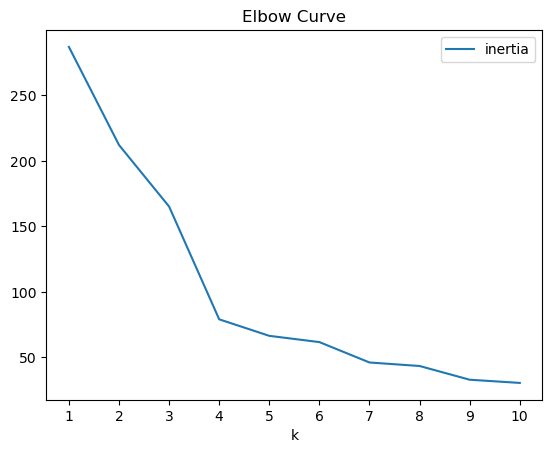

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y= "inertia", 
    title="Elbow Curve", 
    xticks=k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [26]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower = model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
df_market_data_scaled[:5]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [28]:
# Create a copy of the DataFrame
market_data_predictions = df_market_data_scaled.copy()

In [55]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions['predicted_clusters'] = k_lower

# Display sample data
market_data_predictions

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_lower,clusters_higher,predicted_clusters
coinid,,,,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2,2
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2,2,2
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2,2,2
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2,2,2
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2,2,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

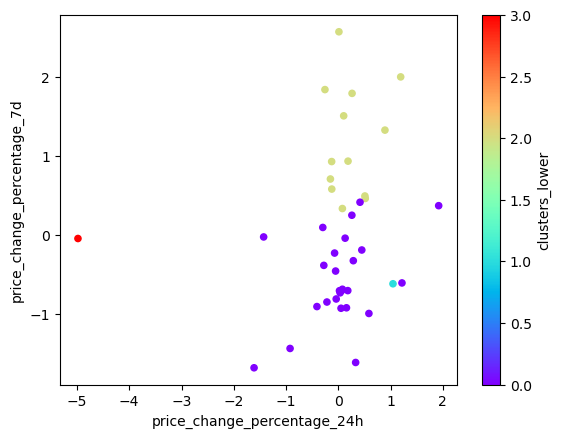

In [31]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters_lower",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [32]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [33]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca_data = pca.fit_transform(market_data_scaled)

# View the first five rows of the DataFrame. 
market_data_scaled[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [34]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89503166

In [39]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
df_market_pca = pd.DataFrame(market_pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
df_market_pca["coin_id"] = market_data_df.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

# Display sample data
df_market_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

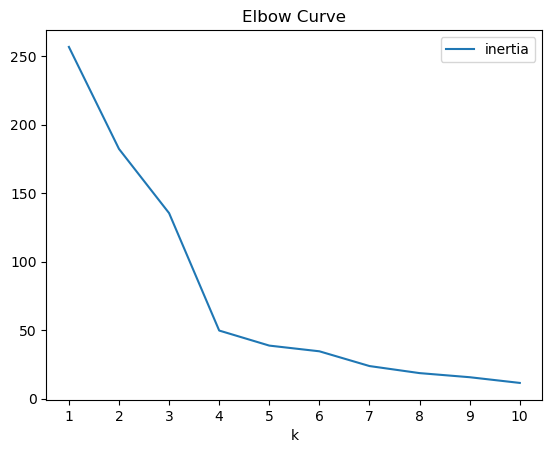

In [42]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y= "inertia", 
    title="Elbow Curve", 
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [43]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [44]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

KMeans(n_clusters=4, random_state=1)

In [45]:
# Predict the clusters to group the cryptocurrencies using the PCA data
market_clusters = model.predict(df_market_pca)

# Print the resulting array of cluster values.
market_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [46]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_predictions["crypto_cluster"] = market_clusters

# Display sample data
df_market_pca_predictions.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [54]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
df_market_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap='winter'
)

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [56]:
# Use the columns from the original scaled DataFrame as the index.
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    